In [0]:

import pandas as pd
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Base de donnée foret
downloaded = drive.CreateFile({'id': '13IDmojFEIUJys7nYBpO6gsDkgpYP7aov'})
downloaded.GetContentFile('13IDmojFEIUJys7nYBpO6gsDkgpYP7aov')
foret = pd.read_csv("13IDmojFEIUJys7nYBpO6gsDkgpYP7aov", skiprows=3) 
#https://drive.google.com/open?id=13IDmojFEIUJys7nYBpO6gsDkgpYP7aov

#Base de donnée Agricole
downloaded = drive.CreateFile({'id': '1DWYXI77EN8mNbHCZdaibNdRa9sicqjku'})
downloaded.GetContentFile('1DWYXI77EN8mNbHCZdaibNdRa9sicqjku')
agri = pd.read_csv("1DWYXI77EN8mNbHCZdaibNdRa9sicqjku", skiprows=3) 
#https://drive.google.com/open?id=1DWYXI77EN8mNbHCZdaibNdRa9sicqjku

In [0]:
#Nettoyage et mise en forme données Foret
foret = foret.drop(["Country Code","Indicator Name","Indicator Code","Unnamed: 64"], axis=1)
foret = foret.T
foret.columns = foret.iloc[0]
foret = foret.iloc[1:]


In [3]:
#Création dataframe Monde
foret_monde = pd.DataFrame(foret['Monde'])
foret_monde.rename(columns={'Monde': "Surf"}, inplace = True)
foret_monde['Region'] = 'Monde'
foret_monde['Surf'] = foret_monde['Surf']*1e-6
foret_monde.tail()

,Surf,Region
2015,39.9913,Monde
2016,39.9582,Monde
2017,NaN,Monde
2018,NaN,Monde
2019,NaN,Monde


In [4]:
#Création dataframe Brésil
foret_bresil = pd.DataFrame(foret['Brésil'])
foret_bresil.rename(columns={'Brésil': "Surf"}, inplace = True)
foret_bresil['Region'] = 'Brésil'
foret_bresil['Surf'] = foret_bresil['Surf']*1e-5
foret_bresil.tail()

,Surf,Region
2015,49.3538,Brésil
2016,49.2554,Brésil
2017,NaN,Brésil
2018,NaN,Brésil
2019,NaN,Brésil


In [5]:
#Union des deux dataframe Brésil et Monde
data_foret = pd.concat([foret_monde, foret_bresil])
data_foret = data_foret.dropna(axis=0)
data_foret['Surf'] = pd.to_numeric(data_foret['Surf'])
data_foret.head()

,Surf,Region
1990,41.282695,Monde
1991,41.210027,Monde
1992,41.137360,Monde
1993,41.064693,Monde
1994,40.992026,Monde


In [0]:
#Nettoyage et mise en forme données Agricole
agri = agri.drop(["Country Code","Indicator Name","Indicator Code","Unnamed: 64"], axis=1)
agri = agri.T
agri.columns = agri.iloc[0]
agri = agri.iloc[1:]

In [7]:
#Création dataframe Monde
agri_monde = pd.DataFrame(agri['Monde'])
agri_monde.rename(columns={'Monde': "Surf"}, inplace = True)
agri_monde['Region'] = 'Monde'
agri_monde['Surf'] = agri_monde['Surf']*1e-6

,Surf,Region
1960,NaN,Monde
1961,37.1897,Monde
1962,37.2824,Monde
1963,37.4054,Monde
1964,37.5057,Monde


In [8]:
#Création dataframe Brésil
agri_bresil = pd.DataFrame(agri['Brésil'])
agri_bresil.rename(columns={'Brésil': "Surf"}, inplace = True)
agri_bresil['Region'] = 'Brésil'
agri_bresil['Surf'] = agri_bresil['Surf']*1e-5

,Surf,Region
1960,NaN,Brésil
1961,15.0531,Brésil
1962,15.5913,Brésil
1963,16.1511,Brésil
1964,16.6041,Brésil


In [9]:
#Union des deux dataframe Brésil et Monde
data_agri = pd.concat([agri_monde, agri_bresil])
data_agri = data_agri.dropna(axis=0)
#data_agri = data_agri.drop()
data_agri['Surf'] = pd.to_numeric(data_agri['Surf'])

,Surf,Region
1961,37.189666,Monde
1962,37.282413,Monde
1963,37.405408,Monde
1964,37.505718,Monde
1965,37.624443,Monde


In [0]:
data_foret['Year'] = pd.to_numeric(data_foret.index)
data_agri['Year'] = pd.to_numeric(data_agri.index)
#data_agri[data_agri['Region'] == 'Monde'].index

In [0]:
data_agri['Year'] = pd.to_numeric(data_agri.index)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


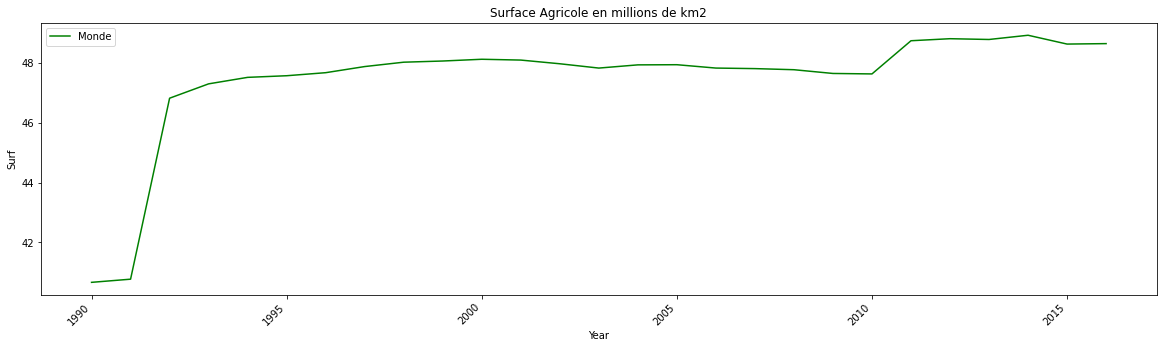

In [12]:
import seaborn as sns
#Création graph "Surface Agricole en millions de km2"
plt.figure(figsize=(20,5))
sns.lineplot(x = 'Year', y = 'Surf', data = data_agri[(data_agri['Region'] == 'Monde') & (data_agri['Year'] > 1989)], color='green', label = "Monde")
plt.title("Surface Agricole en millions de km2")
plt.xticks(rotation = 45, ha = "right")
plt.show()

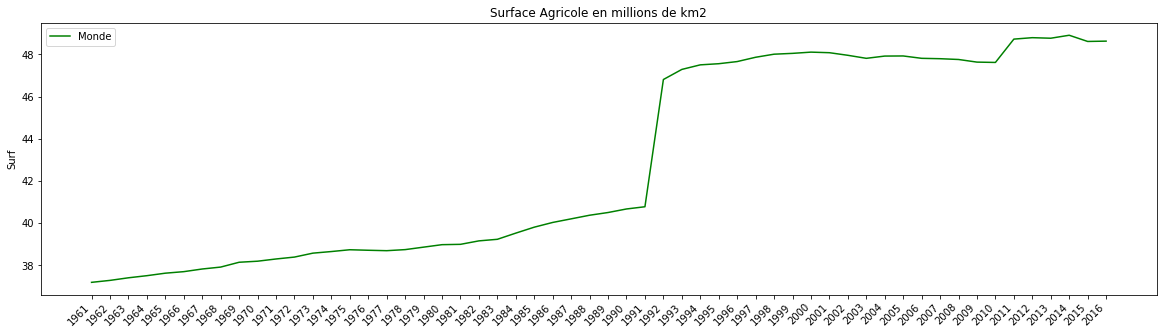

In [13]:
import seaborn as sns
#Création graph "Surface Agricole en millions de km2"
plt.figure(figsize=(20,5))
sns.lineplot(x =data_agri[data_agri['Region'] == 'Monde'].index, y = 'Surf', data = data_agri[data_agri['Region'] == 'Monde'], color='green', label = "Monde")
plt.title("Surface Agricole en millions de km2")
plt.xticks(rotation = 45, ha = "right")
plt.show()

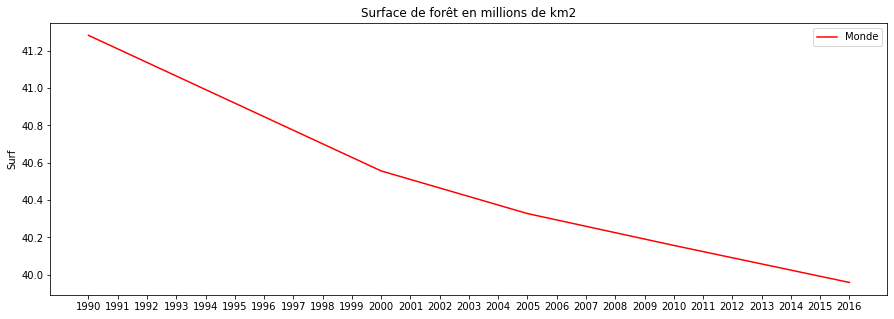

In [14]:
#Création graph "Surface de forêt en millions de km2"
plt.figure(figsize=(15,5))
sns.lineplot(x = data_foret[data_foret['Region'] == 'Monde'].index, y = 'Surf', data = data_foret[data_foret['Region'] == 'Monde'], color='r',label = "Monde")
plt.title("Surface de forêt en millions de km2")
plt.show()

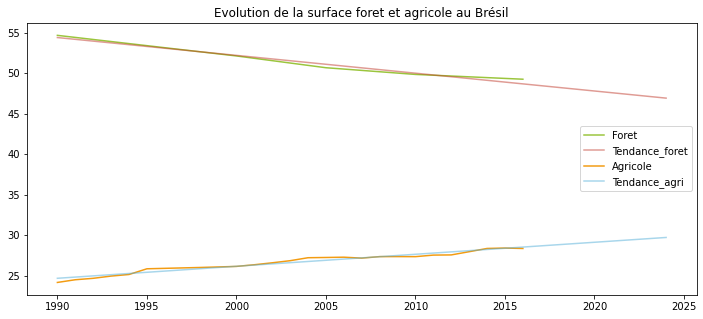

In [15]:
#Graphes comparatif avec prédiction pour le brésil
# Paramètres du modèle
import numpy as np

df = data_foret[data_foret['Region'] == 'Brésil']
df1 = data_agri[(data_agri['Region'] == 'Brésil')& (data_agri['Year'] > 1989)]

Xaxis = df['Year']
Yaxis = df['Surf']
Xmin = Xaxis.min()
Xmax = Xaxis.max()
array = np.arange(Xmin, 2025)

Xaxis1 = df1['Year']
Yaxis1 = df1['Surf']
Xmin1 = Xaxis1.min()
Xmax1 = Xaxis1.max()
array1 = np.arange(Xmin1, 2025)

fig, ax = plt.subplots(figsize = (12, 5))
_ = plt.plot('Year', 'Surf', data = df, c = '#9BC53D')
_ = plt.plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 1))(array), c = '#C0392B', alpha = .5)
_ = plt.plot('Year', 'Surf', data = df1, c = '#F39C12')
_ = plt.plot(array1, np.poly1d(np.polyfit(x = Xaxis1, y = Yaxis1, deg = 1))(array1), c = '#52AED8', alpha = .5)
_=plt.legend(labels = ['Foret', 'Tendance_foret', 'Agricole', 'Tendance_agri'])
_=plt.title("Evolution de la surface foret et agricole au Brésil")
plt.show()


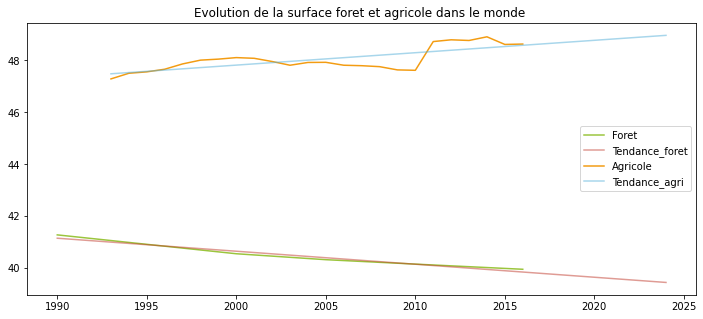

In [16]:
#Graphes comparatif avec prédiction pour monde
# Paramètres du modèle
import numpy as np

df = data_foret[data_foret['Region'] == 'Monde']
df1 = data_agri[(data_agri['Region'] == 'Monde')& (data_agri['Year'] > 1992)]

Xaxis = df['Year']
Yaxis = df['Surf']
Xmin = Xaxis.min()
Xmax = Xaxis.max()
array = np.arange(Xmin, 2025)

Xaxis1 = df1['Year']
Yaxis1 = df1['Surf']
Xmin1 = Xaxis1.min()
Xmax1 = Xaxis1.max()
array1 = np.arange(Xmin1, 2025)

fig, ax = plt.subplots(figsize = (12, 5))
_ = plt.plot('Year', 'Surf', data = df, c = '#9BC53D')
_ = plt.plot(array, np.poly1d(np.polyfit(x = Xaxis, y = Yaxis, deg = 1))(array), c = '#C0392B', alpha = .5)
_ = plt.plot('Year', 'Surf', data = df1, c = '#F39C12')
_ = plt.plot(array1, np.poly1d(np.polyfit(x = Xaxis1, y = Yaxis1, deg = 1))(array1), c = '#52AED8', alpha = .5)
_=plt.legend(labels = ['Foret', 'Tendance_foret', 'Agricole', 'Tendance_agri'])
_=plt.title("Evolution de la surface foret et agricole dans le monde ")
plt.show()

In [0]:
data = data_agri[data_agri['Region'] == 'Monde'].merge(data_foret[data_foret['Region'] == 'Monde'], left_on = 'Year', right_on = 'Year', suffixes = ('_agr', '_frt'))

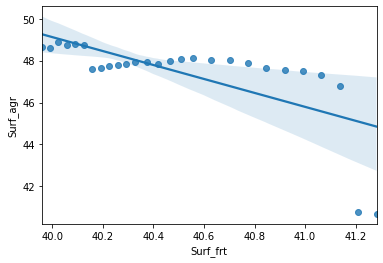

In [36]:
sns.regplot(x = 'Surf_frt', y = 'Surf_agr', data = data)